In [89]:
#Importation de librairies
import pandas as pd

In [90]:
repertoire = "./Data/Reseaux/"
fichier_utilisateurs = repertoire + "utilisateurs.csv"
fichier_temps_passe = repertoire + "reseaux_sociaux.csv"

In [91]:
df_utilisateurs = pd.read_csv(fichier_utilisateurs, encoding="latin-1")

df_donnees = pd.read_csv(fichier_temps_passe, encoding="latin-1")

display(df_utilisateurs)
display(df_donnees)

,id,prénom,nom,date de naissance,adresse IP
0,1,Alba,Henry,1994-08-11,115.199.131.20
1,2,Adèle,Masson,1996-10-11,169.15.124.179
2,3,Eden,Brunet,1993-07-21,236.211.89.59
3,4,Adam,Lefevre,1990-11-12,234.79.33.41
4,5,Gabin,Gerard,1993-07-25,197.121.136.20
...,...,...,...,...,...
9995,9996,Charlie,Rolland,2001-09-21,13.32.252.95
9996,9997,Mia,Mercier,2001-07-22,155.252.161.37
9997,9998,Victor,Girard,2004-11-25,78.251.164.33
9998,9999,Jade,Roger,1991-10-22,89.247.107.245


,id,adresse IP,site,temps passé
0,1,115.199.131.20,WhatsApp,336.9
1,2,169.15.124.179,TikTok,250.5
2,3,169.15.124.179,QQ,51.0
3,4,169.15.124.179,WeChat,82.9
4,5,236.211.89.59,WhatsApp,283.0
...,...,...,...,...
45017,45018,89.247.107.245,Pinterest,65.5
45018,45019,89.247.107.245,LinkedIn,100.6
45019,45020,132.124.158.125,WeChat,110.2
45020,45021,132.124.158.125,Facebook,210.3


In [92]:
df_utilisateurs.rename(columns={'id': 'id_utilisateur'}, inplace=True)

df_donnees.rename(columns={'id': 'id_data'}, inplace=True)

display(df_utilisateurs)
display(df_donnees)

,id_utilisateur,prénom,nom,date de naissance,adresse IP
0,1,Alba,Henry,1994-08-11,115.199.131.20
1,2,Adèle,Masson,1996-10-11,169.15.124.179
2,3,Eden,Brunet,1993-07-21,236.211.89.59
3,4,Adam,Lefevre,1990-11-12,234.79.33.41
4,5,Gabin,Gerard,1993-07-25,197.121.136.20
...,...,...,...,...,...
9995,9996,Charlie,Rolland,2001-09-21,13.32.252.95
9996,9997,Mia,Mercier,2001-07-22,155.252.161.37
9997,9998,Victor,Girard,2004-11-25,78.251.164.33
9998,9999,Jade,Roger,1991-10-22,89.247.107.245


,id_data,adresse IP,site,temps passé
0,1,115.199.131.20,WhatsApp,336.9
1,2,169.15.124.179,TikTok,250.5
2,3,169.15.124.179,QQ,51.0
3,4,169.15.124.179,WeChat,82.9
4,5,236.211.89.59,WhatsApp,283.0
...,...,...,...,...
45017,45018,89.247.107.245,Pinterest,65.5
45018,45019,89.247.107.245,LinkedIn,100.6
45019,45020,132.124.158.125,WeChat,110.2
45020,45021,132.124.158.125,Facebook,210.3


In [93]:
df_merge = df_utilisateurs.merge(df_donnees, on="adresse IP", how="left")

df_merge.head(100)

,id_utilisateur,prénom,nom,date de naissance,adresse IP,id_data,site,temps passé
0,1,Alba,Henry,1994-08-11,115.199.131.20,1,WhatsApp,336.9
1,2,Adèle,Masson,1996-10-11,169.15.124.179,2,TikTok,250.5
2,2,Adèle,Masson,1996-10-11,169.15.124.179,3,QQ,51.0
3,2,Adèle,Masson,1996-10-11,169.15.124.179,4,WeChat,82.9
4,3,Eden,Brunet,1993-07-21,236.211.89.59,5,WhatsApp,283.0
...,...,...,...,...,...,...,...,...
95,22,Léna,Nicolas,1990-04-21,34.205.121.50,96,LinkedIn,141.2
96,22,Léna,Nicolas,1990-04-21,34.205.121.50,97,Snapchat,311.4
97,22,Léna,Nicolas,1990-04-21,34.205.121.50,98,YouTube,654.7
98,22,Léna,Nicolas,1990-04-21,34.205.121.50,99,X,214.3


In [94]:
df_merge.groupby(["id_utilisateur"])["temps passé"].sum().reset_index()

,id_utilisateur,temps passé
0,1,336.9
1,2,384.4
2,3,515.0
3,4,261.2
4,5,875.9
...,...,...
9995,9996,1001.8
9996,9997,1816.9
9997,9998,1263.2
9998,9999,1528.5


In [95]:
df_tps_passe = df_merge.groupby(["id_utilisateur"]).agg(temps_total=("temps passé", "sum")).reset_index()
df_tps_passe

,id_utilisateur,temps_total
0,1,336.9
1,2,384.4
2,3,515.0
3,4,261.2
4,5,875.9
...,...,...
9995,9996,1001.8
9996,9997,1816.9
9997,9998,1263.2
9998,9999,1528.5


In [96]:
df_merge.groupby(["nom", "prénom"])["temps passé"].sum().reset_index()

,nom,prénom,temps passé
0,Andre,Aaron,2539.2
1,Andre,Adam,1497.1
2,Andre,Adèle,2607.8
3,Andre,Agathe,867.7
4,Andre,Alba,2371.7
...,...,...,...
6346,Vincent,Tom,2768.0
6347,Vincent,Valentin,436.1
6348,Vincent,Victoire,2630.6
6349,Vincent,Victor,2464.0


In [97]:
df_tps_passe2 = df_merge.groupby(["nom", "prénom"]) \
    .agg(temps_total=("temps passé", "sum")) \
    .reset_index()
df_tps_passe2

,nom,prénom,temps_total
0,Andre,Aaron,2539.2
1,Andre,Adam,1497.1
2,Andre,Adèle,2607.8
3,Andre,Agathe,867.7
4,Andre,Alba,2371.7
...,...,...,...
6346,Vincent,Tom,2768.0
6347,Vincent,Valentin,436.1
6348,Vincent,Victoire,2630.6
6349,Vincent,Victor,2464.0


In [98]:
df_classement_site = df_merge.groupby(["site"]) \
    .agg(temps_total=("temps passé", "sum")) \
    .sort_values("temps_total", ascending=False) \
    .reset_index()

df_classement_site

,site,temps_total
0,YouTube,1718610.8
1,TikTok,1053983.3
2,Instagram,1044258.2
3,WhatsApp,1028667.5
4,Snapchat,881980.6
5,LinkedIn,521958.8
6,Facebook,517145.5
7,X,516393.3
8,Facebook Messenger,513668.5
9,Twitch,350897.9


In [99]:
df_classement_site.index.to_list()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [100]:
df_classement_site["temps_total"].to_list()

[1718610.8,
 1053983.3,
 1044258.2,
 1028667.5,
 881980.6,
 521958.8,
 517145.5,
 516393.3,
 513668.5,
 350897.9,
 348394.1,
 343995.4,
 176460.1]

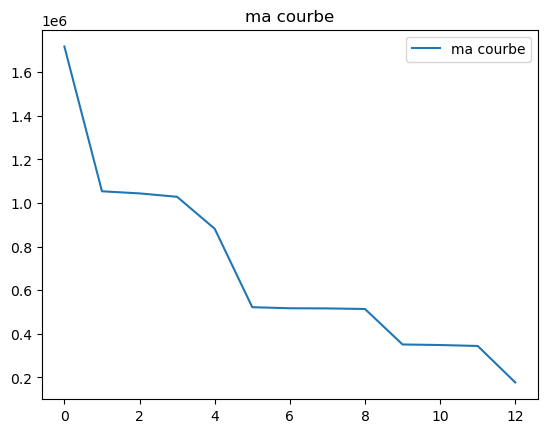

In [101]:
import numpy as np
import matplotlib.pyplot as plt

x = df_classement_site.index
y = df_classement_site["temps_total"]
plt.plot(x, y, label='ma courbe')
plt.title('ma courbe')
plt.legend()
plt.show()


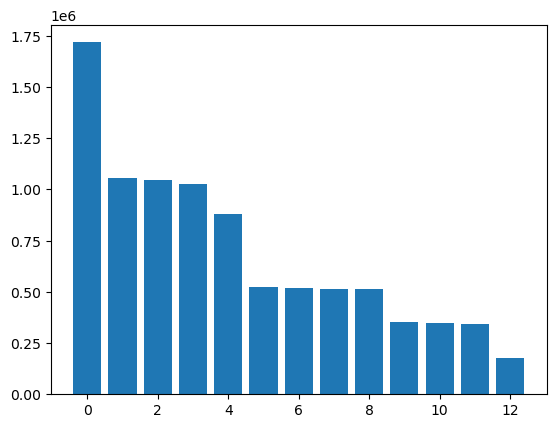

In [102]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

sites = df_classement_site.index
tps = df_classement_site["temps_total"]

ax.bar(sites, tps)

plt.show()

In [103]:
temps_total_tous_sites = df_classement_site["temps_total"].sum()

df_classement_site["pourcentage temps"] = round((df_classement_site["temps_total"] / temps_total_tous_sites) * 100, 2)
df_classement_site

,site,temps_total,pourcentage temps
0,YouTube,1718610.8,19.06
1,TikTok,1053983.3,11.69
2,Instagram,1044258.2,11.58
3,WhatsApp,1028667.5,11.41
4,Snapchat,881980.6,9.78
5,LinkedIn,521958.8,5.79
6,Facebook,517145.5,5.74
7,X,516393.3,5.73
8,Facebook Messenger,513668.5,5.70
9,Twitch,350897.9,3.89


In [104]:
df_merge["année de naissance"] = df_merge["date de naissance"].apply(lambda date: int(date[:4]))

df_merge

,id_utilisateur,prénom,nom,date de naissance,adresse IP,id_data,site,temps passé,année de naissance
0,1,Alba,Henry,1994-08-11,115.199.131.20,1,WhatsApp,336.9,1994
1,2,Adèle,Masson,1996-10-11,169.15.124.179,2,TikTok,250.5,1996
2,2,Adèle,Masson,1996-10-11,169.15.124.179,3,QQ,51.0,1996
3,2,Adèle,Masson,1996-10-11,169.15.124.179,4,WeChat,82.9,1996
4,3,Eden,Brunet,1993-07-21,236.211.89.59,5,WhatsApp,283.0,1993
...,...,...,...,...,...,...,...,...,...
45017,9999,Jade,Roger,1991-10-22,89.247.107.245,45018,Pinterest,65.5,1991
45018,9999,Jade,Roger,1991-10-22,89.247.107.245,45019,LinkedIn,100.6,1991
45019,10000,Mohamed,Girard,1998-03-18,132.124.158.125,45020,WeChat,110.2,1998
45020,10000,Mohamed,Girard,1998-03-18,132.124.158.125,45021,Facebook,210.3,1998


In [105]:
df_classement_site_annee_naissance = df_merge \
    .pivot_table(index=["site"], columns=["année de naissance"], values="temps passé", aggfunc="mean")
df_classement_site_annee_naissance

année de naissance,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004
site,,,,,,,,,,,,,,,
Facebook,149.433182,153.469847,150.402703,154.589686,150.162871,147.682988,152.112273,147.574249,153.184921,152.085778,151.773663,152.339910,146.961435,149.478862,149.006633
Facebook Messenger,146.618421,147.657937,147.086207,147.622594,150.833000,148.971930,150.180417,147.611915,150.475000,151.315538,150.386667,153.352195,148.865574,148.870259,149.495349
Instagram,300.499574,297.067164,307.788987,306.862449,309.629187,301.917647,298.518298,297.377692,306.102691,300.953390,304.589202,300.078873,294.964807,306.521267,301.948848
LinkedIn,149.730126,149.773333,152.852381,147.240417,149.020561,150.531250,152.218107,148.894444,152.838938,146.485169,151.662632,151.247297,152.545690,151.525483,156.996279
Pinterest,98.990351,98.513077,97.761826,97.335745,102.789372,99.582627,99.784322,99.952033,95.474672,99.605882,98.146725,99.581221,100.309821,101.599576,97.916509
QQ,50.942194,50.523552,49.953846,50.145217,49.936842,49.373568,49.807170,50.860504,51.454202,49.688889,51.211737,50.179221,50.210373,49.864159,51.065022
Snapchat,250.965957,252.577959,248.818750,251.642128,257.234389,251.047577,253.193886,246.886694,250.632143,253.115254,250.844000,249.087281,255.651293,247.926721,254.637387
TikTok,307.930131,299.863241,301.897854,310.427966,302.606977,302.357806,305.419262,299.186147,305.546154,302.769697,295.727189,305.365686,303.287903,296.172000,309.585915
Twitch,100.569658,99.576515,100.666390,99.833333,100.960664,100.300881,98.055349,101.508120,99.072689,98.664378,102.654185,97.396957,103.588655,100.885944,99.079717


In [106]:
#from statistics import mean

df_classement_site_annee_naissance2 = df_merge \
    .pivot_table(index=["site"], columns=["année de naissance"], values="temps passé", aggfunc=lambda x:round(mean(x), 2))
df_classement_site_annee_naissance2

année de naissance,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004
site,,,,,,,,,,,,,,,
Facebook,149.43,153.47,150.40,154.59,150.16,147.68,152.11,147.57,153.18,152.09,151.77,152.34,146.96,149.48,149.01
Facebook Messenger,146.62,147.66,147.09,147.62,150.83,148.97,150.18,147.61,150.47,151.32,150.39,153.35,148.87,148.87,149.50
Instagram,300.50,297.07,307.79,306.86,309.63,301.92,298.52,297.38,306.10,300.95,304.59,300.08,294.96,306.52,301.95
LinkedIn,149.73,149.77,152.85,147.24,149.02,150.53,152.22,148.89,152.84,146.49,151.66,151.25,152.55,151.53,157.00
Pinterest,98.99,98.51,97.76,97.34,102.79,99.58,99.78,99.95,95.47,99.61,98.15,99.58,100.31,101.60,97.92
QQ,50.94,50.52,49.95,50.15,49.94,49.37,49.81,50.86,51.45,49.69,51.21,50.18,50.21,49.86,51.07
Snapchat,250.97,252.58,248.82,251.64,257.23,251.05,253.19,246.89,250.63,253.12,250.84,249.09,255.65,247.93,254.64
TikTok,307.93,299.86,301.90,310.43,302.61,302.36,305.42,299.19,305.55,302.77,295.73,305.37,303.29,296.17,309.59
Twitch,100.57,99.58,100.67,99.83,100.96,100.30,98.06,101.51,99.07,98.66,102.65,97.40,103.59,100.89,99.08


In [107]:
df_merge \
    .pivot_table(index=["site", "année de naissance"], values="temps passé", aggfunc=lambda x:round(mean(x), 2)) \
    .reset_index()

,site,année de naissance,temps passé
0,Facebook,1990,149.43
1,Facebook,1991,153.47
2,Facebook,1992,150.40
3,Facebook,1993,154.59
4,Facebook,1994,150.16
...,...,...,...
190,YouTube,2000,500.25
191,YouTube,2001,501.86
192,YouTube,2002,498.48
193,YouTube,2003,501.04
